In [2]:
%matplotlib inline
from pathlib import Path
from pycbc.waveform import get_td_waveform
import pylab
import numpy as np

import pycbc.noise
import pycbc.psd


# The color of the noise matches a PSD which you provide
flow = 30.0
delta_f = 1.0 / 16
flen = int(2048 / delta_f) + 1 
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)

# Generate 32 seconds of noise at 4096 Hz
delta_t = 1.0 / 4096

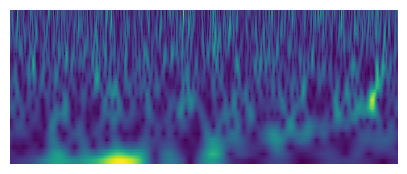

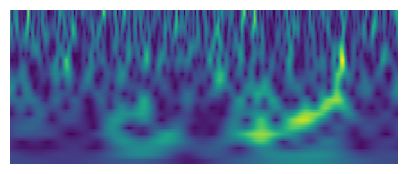

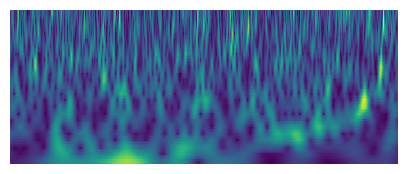

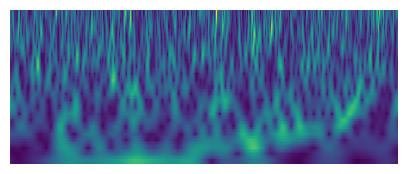

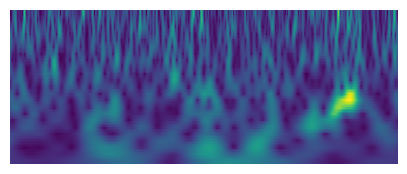

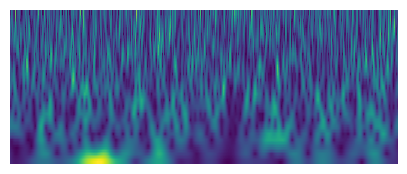

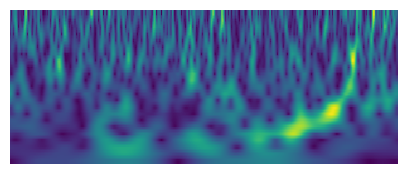

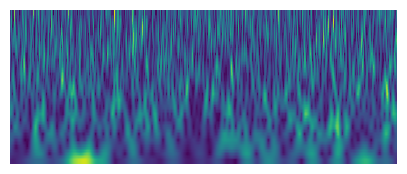

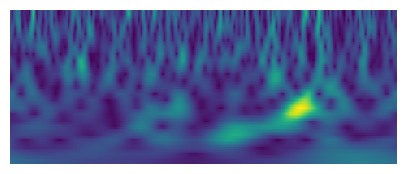

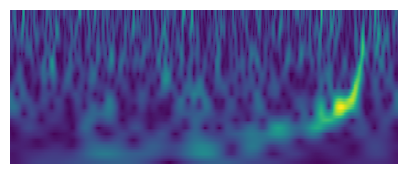

In [26]:
# num,seed,hp2,hp3
import random
a = 5
b = 30
c = 200
d = 3000
num = 10
# np.random.seed(0)
Mass1 = (b - a) * np.random.rand(num) + a   #a以上b未満の乱数
Mass2 = (b - a) * np.random.rand(num) + a
distance = (d - c) * np.random.rand(num) + c 

for m1,m2,d,i in zip(Mass1,Mass2,distance,range(num+1)):
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m1,
                         mass2=m2,
                         delta_t=1.0/4096,
                         f_lower=30,
                         distance=d) 
    hp.start_time = 0
    ts = pycbc.noise.noise_from_psd(len(hp.sample_times), delta_t, psd, seed=127)
    hp2 = hp +ts
    hp3 = ts
    times,freqs,power = hp2.qtransform(0.001, logfsteps = 100,
                                             qrange=(8,8),
                                             frange=(30,512),)

    pylab.figure(figsize=[5,2])
    pylab.pcolormesh(times,freqs,power**0.5)  
    pylab.yscale('log')
    pylab.axis('off')
#    pylab.colorbar()
    pylab.show()
    # pylab.savefig(Path().cwd().parent/"MLimages/images9/signal_train/%03.f"%(i)+".jpg")
    # pylab.close()